# 3. Qualitative Explanatory Variables Regression Models

In [1]:
suppressPackageStartupMessages({
  library(tidyverse)
  library(tidymodels)
  library(readxl)
  library(multcomp)
  library(car)
})

## Wage function

$$
Wage_i = \beta_1 + \beta_2D_{2i} + \beta_3D_{3i} + \beta_4D_{4i} + \beta_5Educ_i + \beta_6Exper_i + ui
$$

$D_2$ = 1 if female, 0 for male  
$D_3$ = 1 for nonwhite, 0 for white
$D_4$ = 1 union member, 0 non union
All $D$ are dummy variables

In [2]:
df <- read_excel("data/Table1_1.xls")
head(df,3)

obs,wage,female,nonwhite,union,education,exper,age,wind,femalenonw,lnwage,education_exper,_Ifemale_1,_IfemXeduca_1,_IfemXexper_1,_Inonwhite_1,_InonXeduca_1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,11.55,1,0,0,12,20,38,1,0,2.446686,240,1,12,20,0,0
2,5.00,0,0,0,9,9,24,0,0,1.609438,81,0,0,0,0,0
3,12.00,0,0,0,16,15,37,1,0,2.484907,240,0,0,0,0,0


In [3]:
model <- lm(wage~ female + nonwhite + union + education + exper, data = df)
tidy(model)
glance(model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.1833382,1.01578786,-7.071691,2.508276e-12
female,-3.0748754,0.36461621,-8.433184,8.939423e-17
nonwhite,-1.5653133,0.50918754,-3.074139,2.155664e-03
union,1.0959758,0.50607809,2.165626,3.052356e-02
education,1.3703010,0.06590421,20.792312,5.507613e-83
exper,0.1666065,0.01604756,10.382050,2.659960e-24


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.3233388,0.3207018,6.508137,122.6149,3.453151e-106,5,-4240.37,8494.741,8530.872,54342.54,1283,1289


**female dummy variable:** average wage of female is lower by $3.07 as compared to average wage of a male(reference category), ceteris paribus 

**union dummy variable:** average wage of union is higher by $1.10 as compared to average wage of non union workers, , ceteris paribus 

**nonwhite dummy variable:** average wage of nonwhite worker is lower by $1.56 as compared to average wage of white workers, , ceteris paribus 

**Intercept:** –7.18 isthe expected
hourly wage for white, non-union, male worker  

called **differential intercept dummies**

## Refinement of the wage function

**Interactive dummy:** female non white worker

In [4]:
model2 <- lm(wage~ female + nonwhite + union + education + exper + female*nonwhite, data = df)
tidy(model2)
glance(model2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.088725,1.01948176,-6.953264,5.671212e-12
female,-3.240148,0.39532778,-8.196106,5.961063e-16
nonwhite,-2.158525,0.74842579,-2.884087,3.991105e-03
union,1.115044,0.50635176,2.202113,2.783489e-02
education,1.370113,0.06590009,20.790761,5.752227e-83
exper,0.165856,0.01606150,10.326307,4.560482e-24
female:nonwhite,1.095371,1.01289673,1.081424,2.797118e-01


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.3239555,0.3207915,6.507707,102.3875,2.252543e-105,6,-4239.783,8495.565,8536.858,54293.02,1282,1289


**Interactive dummy:** Being a female has a lower salary by 3.2.  
Being a nonwhite worker has a lower salary by 2.15.  
Being both a female nonwhite worker has a lower salary (-3.2 - 2.15 + 1.10) = -4.25.


## Another refinement of the wage function

\begin{align}
\text{wage}_i &= \beta_1  + \beta_2 \text{female} + \beta_3  \text{nonwhite} +\beta_4 \text{union}+\beta_5 \text{educ}\\
&+\beta_6 \text{exper} +\beta_7( \text{female * Educ}) +\beta_8 (\text{nonwhite * Educ}) \\
&+\beta_9 (\text{union * Educ}) +\beta_{10} (\text{female * exper}) +\beta_{11} (\text{nonwhite * exper})\\
&+ \beta_{12} (\text{union * exper}) + u_i
\end{align}

$\beta_2, \beta_3, \beta_4$ are diferential intercept dummies  
$\beta_7 \to \beta_{11}$ are **differential slope dummies**

In [5]:
model3 <- lm(wage~ female + nonwhite + union + education + exper +
             female*education + female*exper +
             nonwhite*education + nonwhite*exper +
             union*education + union*exper, data = df)
tidy(model3)
glance(model3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-11.09128575,1.42184620,-7.8006227,1.272876e-14
female,3.17415751,1.96646494,1.6141440,1.067433e-01
nonwhite,2.90912852,2.78006592,1.0464243,2.955632e-01
union,4.45421150,2.97349392,1.4979723,1.343876e-01
education,1.58712500,0.09381936,16.9168183,4.408735e-58
exper,0.22091235,0.02510676,8.7989186,4.394876e-18
female:education,-0.33688760,0.13199299,-2.5523143,1.081657e-02
female:exper,-0.09612482,0.03181329,-3.0215303,2.565047e-03
nonwhite:education,-0.32185517,0.19534842,-1.6475954,9.968173e-02


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.3328109,0.3270637,6.477589,57.90909,3.562619e-104,11,-4231.285,8488.569,8555.67,53581.84,1277,1289


**female*experience:** for each additional year of experience, the increase in income for females is 0.09 units less than for males.

## Functional form of wage regression

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.84    6.92   10.08   12.37   15.63   64.08 


	Shapiro-Wilk normality test

data:  df$wage
W = 0.84488, p-value < 2.2e-16


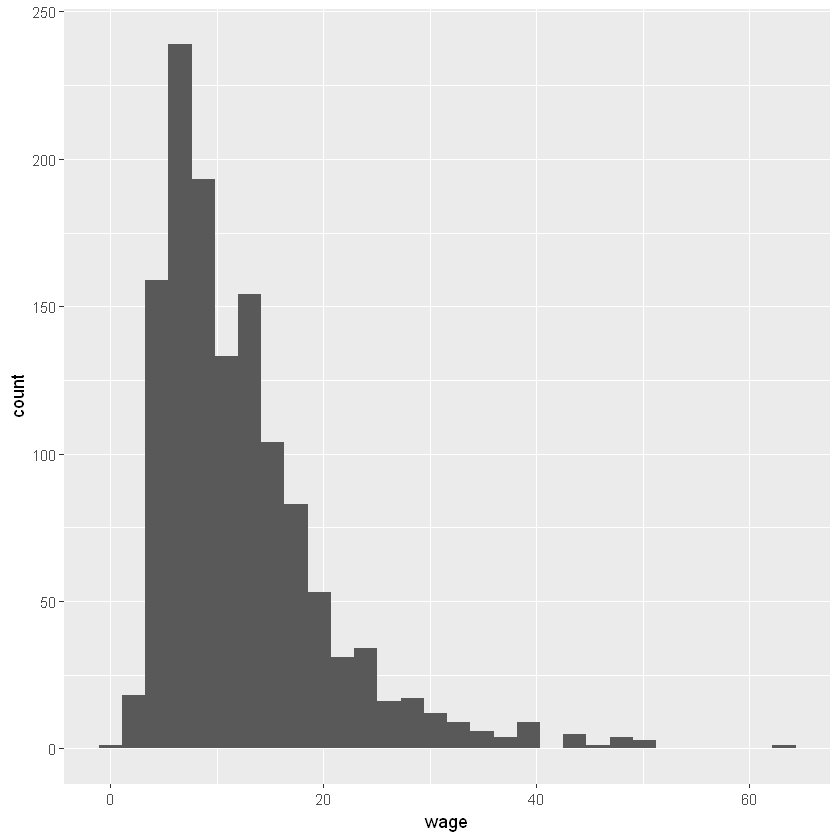

In [6]:
summary(df$wage)

ggplot(df, aes(x = wage))+ 
        geom_histogram(bins = 30)

shapiro.test(df$wage)

In [7]:
library(moments)
skewness(df$wage)
kurtosis(df$wage)

[1] 1.848114

[1] 7.836566

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1744  1.9344  2.3106  2.3424  2.7492  4.1601 

[1] 0.01339499

[1] 3.226337

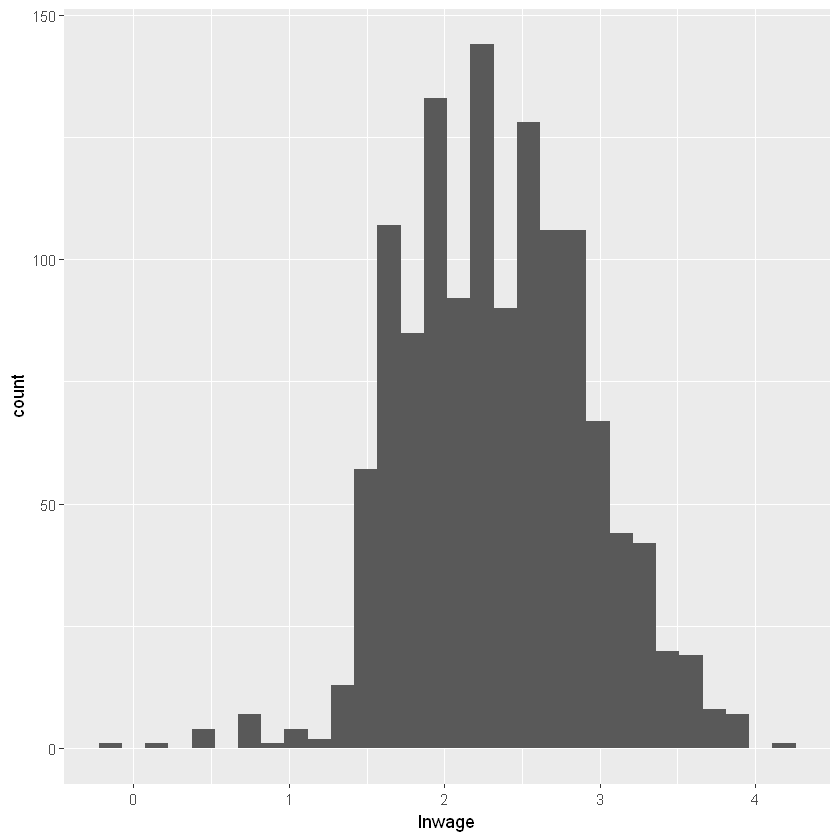

In [8]:
summary(df$lnwage)
skewness(df$lnwage)
kurtosis(df$lnwage)

ggplot(df, aes(x = lnwage))+ 
        geom_histogram(bins = 30)

In [9]:
library('tseries')
jarque.bera.test(df$lnwage)
shapiro.test(df$lnwage)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




	Jarque Bera Test

data:  df$lnwage
X-squared = 2.7899, df = 2, p-value = 0.2478



	Shapiro-Wilk normality test

data:  df$lnwage
W = 0.99175, p-value = 1.268e-06


In [10]:
model4 <-  lm(lnwage~ female + nonwhite + union + education + exper, data = df)
tidy(model4)
glance(model4)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.90550368,0.074174901,12.207683,1.662727e-32
female,-0.24915404,0.026625019,-9.357891,3.511043e-20
nonwhite,-0.13353510,0.037181913,-3.591399,3.413335e-04
union,0.18020354,0.036954854,4.876316,1.216066e-06
education,0.09987030,0.004812460,20.752442,1.025031e-82
exper,0.01276009,0.001171825,10.889073,1.795174e-26


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.3456505,0.3431004,0.4752374,135.5452,1.738922e-115,5,-867.0651,1748.13,1784.261,289.7663,1283,1289


**education coefficient** of 0.0999 suggests that
for every additional year of schooling, the average wage rate goes up by about 9.99%,
ceteris paribus

**female dummy coefficient** of –0.2492 as suggesting that the average female wage rate is lower by
24.92% as compared to the male average wage rate. (approximately)

In [11]:
(exp(-0.2492) - 1) * 100

[1] -22.05759

 average female wage rate is lower by 22% as compared to the male average wage rate. (exact)

## Dummy variables in structural change

$$
GPI_t = B_1 + B_2GPS_t +u_t, 
$$
**GPS:** gross private savings  
**GPI:** gross private investments

In [12]:
df2 <- read_excel("data/Table3_6.xls")
head(df2,3)

obs,gpi,gps,recession81,gpsrec81
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1959,78.5,84.6,0,0
1960,78.9,84.8,0,0
1961,78.2,91.8,0,0


In [13]:
model5 <- lm(gpi ~ gps, data = df2)
tidy(model5)
glance(model5)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-78.721047,27.48474252,-2.864173,6.230637e-03
gps,1.107395,0.02907993,38.081092,5.567391e-37


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9686074,0.9679395,114.8681,1450.17,5.567391e-37,1,-300.9524,607.9049,613.5803,620149.8,47,49


if GPS increases by a dollar, the average GPI goes up by about $1.10.

### Check for structural break

$$
GPI_t = B_1 + B_2GPS_t + \beta_3 \text{Recession81}_t + u_t, 
$$
**GPS:** gross private savings  
**GPI:** gross private investments  
**Recession81:** 0 before year 1981, 1 afterwords

In [14]:
model6 <- lm(gpi ~ gps + recession81, data = df2)
tidy(model6)
glance(model6)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-83.486025,23.15912656,-3.604887,7.649795e-04
gps,1.288672,0.04706553,27.380380,4.045379e-30
recession81,-240.787848,53.39662813,-4.509420,4.464419e-05


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9782308,0.9772843,96.68906,1033.538,5.893647e-39,2,-291.9836,591.9672,599.5345,430043.7,46,49


Intercept pre recession: -83  
Intercept post recession: (-83-240) = -324

To check for slope:

$$
GPI_t = B_1 + B_2GPS_t + \beta_3 \text{Recession81}_t +  \beta_4 \text{GPS * Recession81}+ u_t, 
$$

In [15]:
model7 <- lm(gpi ~ gps + recession81 + gps*recession81, data = df2)
tidy(model7)
glance(model7)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.7798689,38.4495931,-0.2023394,8.405634e-01
gps,0.9510818,0.1474505,6.4501785,6.686678e-08
recession81,-357.4586528,70.2863017,-5.0857513,6.910536e-06
gps:recession81,0.3719201,0.1547662,2.4031102,2.044029e-02


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9807067,0.9794205,92.03045,762.4731,1.42319e-38,3,-289.0255,588.051,597.5101,381132.2,45,49


GPI pre recession: -7.78 + 0.95 GPS  
GPI post recession: (-7.78 - 357.45) + (0.95 + 0.37) GPS

## Dummy variables in seasonal data (deseasonalization)

In [16]:
df3 <- read_excel("data/Table3_10.xls")
head(df3,3)

obs,sales,rpdi,conf,d2,d3,d4,lnsales,yearq,trend
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1986:1,53.714,84.18,286.6,0,0,0,3.983674,21916,1
1986:2,71.501,85.04,290.3,1,0,0,4.269711,21916,2
1986:3,96.374,84.57,284.5,0,1,0,4.568236,21916,3


$$
Sales_t = A_1 + A_2D_{2t} + A_3D_{3t} + A_4D_{4t} + u_t 
$$
$D_2$ = 1 for second quarter  
$D_3$ = 1 for third quarter  
$D_4$ = 1 for fourth quarter  

In [17]:
model8 <- lm(sales ~  d2 + d3 + d4, data = df3)
tidy(model8)
glance(model8)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),73.18343,3.977483,18.399433,1.178376e-15
d2,14.69229,5.625010,2.611957,1.528526e-02
d3,27.96472,5.625010,4.971496,4.468310e-05
d4,57.11472,5.625010,10.153709,3.646049e-10


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.8234883,0.8014244,10.52343,37.32278,3.372103e-09,3,-103.4731,216.9462,223.6072,2657.822,24,28


**Interpretation ofD2** is that the mean sales value in
the second quarter is greater than the mean sales in the first, or reference, quarter
by 14.69229 units; the actual mean sales value in the second quarter is (73.18343 +
14.69229) = 87.87572. 

### Deseasonalize
1. obtain estimated sales  volume
2. obtain residuals (actual sales - estimated sales)
3. add mean value of sales to residuals

In [18]:
augmented <- augment(model8)

In [19]:
augmented <- augmented %>%
mutate(deseasonalized_sales = .resid + mean(augmented$sales))

In [20]:
head(augmented)

sales,d2,d3,d4,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid,deseasonalized_sales
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53.714,0,0,0,73.18343,-19.469427,0.1428571,9.814778,0.166390008,-1.9983394,78.65693
71.501,1,0,0,87.87571,-16.374714,0.1428571,10.097357,0.117697809,-1.6806985,81.75164
96.374,0,1,0,101.14814,-4.774144,0.1428571,10.695856,0.010004880,-0.4900175,93.35221
125.041,0,0,1,130.29814,-5.257143,0.1428571,10.684361,0.012131669,-0.5395925,92.86921
78.610,0,0,0,73.18343,5.426573,0.1428571,10.680063,0.012926240,0.5569827,103.55293
89.609,1,0,0,87.87571,1.733287,0.1428571,10.742676,0.001318749,0.1779044,99.85964


## Expanded sales function
Frisch_Waugh Theorem

In [21]:
model9 <- lm(sales ~  rpdi + conf+ d2 + d3 + d4, data = df3)
tidy(model9)
glance(model9)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-152.9292193,52.59149307,-2.907870,8.156667e-03
rpdi,1.5989033,0.37015528,4.319547,2.764247e-04
conf,0.2939096,0.08437568,3.483344,2.106581e-03
d2,15.0452205,4.31537708,3.486421,2.091102e-03
d3,26.0024741,4.32524385,6.011794,4.741138e-06
d4,60.8722628,4.42743714,13.748871,2.795431e-12


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9053748,0.883869,8.047637,42.09922,1.53222e-10,5,-94.74461,203.4892,212.8146,1424.818,22,28


## Piecewise Linear Regression
introduce threshold (knot)

In [22]:
df4 <- read_excel("data/Table3_16.xls")
head(df4)

obs,avgcost,lotsize,z,d,zd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.73,100,-100,0,0
2,9.61,120,-80,0,0
3,8.15,140,-60,0,0
4,6.98,160,-40,0,0
5,5.87,180,-20,0,0
6,4.98,200,0,0,0


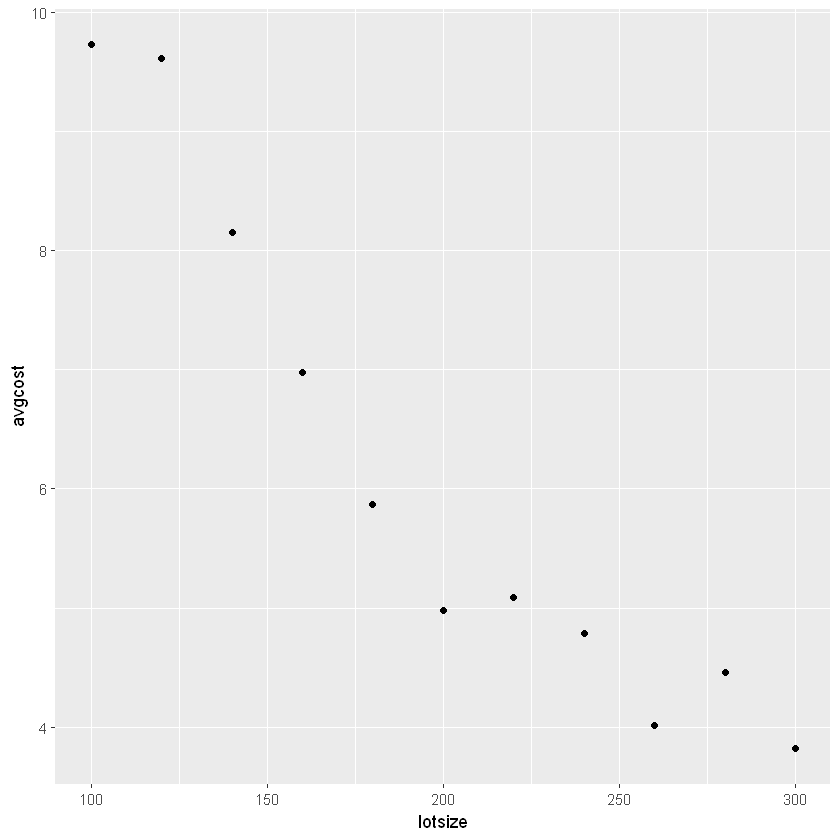

In [23]:
ggplot(df4, aes(x = lotsize, y = avgcost)) +
geom_point()

$$
Y_i = \beta_0 + \beta_1 X_i + \beta_2(X_i-X^*)D_i + u_i
$$
Y = average production cost,  
X = lot size,  
X* = threshold value of lot size,  
D = 1 if Xi > X*  
D = 0 if Xi < X

In [24]:
model10 <- lm(avgcost ~ lotsize, data = df4)
tidy(model10)
glance(model10)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),12.29090855,0.749146219,16.406555,5.167361e-08
lotsize,-0.03077273,0.003571414,-8.616397,1.217549e-05


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.8918819,0.8798688,0.7491462,74.2423,1.217549e-05,1,-11.3276,28.65521,29.84889,5.050981,9,11


In [25]:
model10 <- lm(avgcost ~ lotsize + zd, data = df4)
tidy(model10)
glance(model10)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),15.11647994,0.535382569,28.234912,2.674940e-09
lotsize,-0.05019853,0.003332127,-15.065011,3.726359e-07
zd,0.03885161,0.005945966,6.534112,1.814740e-04


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9829381,0.9786727,0.3156508,230.4409,8.474347e-08,2,-1.172523,10.34505,11.93663,0.7970835,8,11


lot size < 200  
Average cost = 15.1164 – 0.0502 lot size,            

lot size > 200   
Average cost = (15.1164 – 0.0385 × 200) + (–0.0502 + 0.0388) lot size
= 7.4164 – 0.0114 lot size,       

up to a lot size of 200
units, the unit cost decreases by 5 cents per unit increase in the lot size, but beyond
the lot size of 200 units, it decreases only by about 1 cent

## Exercises

🚧 Under Construction